# 목차
<hr/>

<ol>
    <li style = "margin-bottom:30px; list-style: none;"><i style = "font-weight:bold;font-style: normal;">필요한 모듈 불러오기</i>
    <li style = "margin-bottom:30px; list-style: none;"><i style = "font-weight:bold;font-style: normal;"><span style = "font-weight:bold;color:#0172d4;">STEP 1</span> : 들어가며</i>
        <ul style = "margin-top:10px; list-style:none;">
            <li style = "margin-bottom:3px;"><span style = "font-weight:bold;color:#0172d4;">1. </span> 참가 규칙, 평가 기준 살펴보기
            </li>
            <li style = "margin-bottom:5px;"><span style = "font-weight:bold;color:#0172d4;">2. </span> 데이터 살펴보기</li>
            <li style = "margin-bottom:5px;"><span style = "font-weight:bold;color:#0172d4;">3. </span> train, test 데이터 분리</li>
        </ul>
    </li><li style = "margin-bottom:30px; list-style: none;"><i style = "font-weight:bold;font-style: normal;"><span style = "font-weight:bold;color:#0172d4;">STEP 2</span> : 대회의 시작: 참가 규칙과 데이터, 평가 기준 살펴보기</i>
        <ul style = "margin-top:10px; list-style:none;">
            <li style = "margin-bottom:3px;"><span style = "font-weight:bold;color:#0172d4;">1. </span> 데이터 준비
            </li>
            <li style = "margin-bottom:5px;"><span style = "font-weight:bold;color:#0172d4;">2. </span> 데이터 이해</li>
            <li style = "margin-bottom:5px;"><span style = "font-weight:bold;color:#0172d4;">3. </span> train, test 데이터 분리</li>
        </ul>
    </li>
    <li style = "margin-bottom:30px; list-style: none;"><i style = "font-weight:bold;font-style: normal;"><span style = "font-weight:bold;color:#0172d4;">STEP 3</span> : 일단 제출하고 시작해!  Baseline 모델</i>
        <ul style = "margin-top:10px; list-style:none;">
            <li style = "margin-bottom:3px;"><span style = "font-weight:bold;color:#0172d4;">1. </span> Baseline 셋팅하기
            </li>
            <li style = "margin-bottom:5px;"><span style = "font-weight:bold;color:#0172d4;">2. </span> 데이터 이해</li>
            <li style = "margin-bottom:5px;"><span style = "font-weight:bold;color:#0172d4;">3. </span> train, test 데이터 분리</li>
        </ul>
    </li>
    <li style = "margin-bottom:30px; list-style: none;"><i style = "font-weight:bold;font-style: normal;"><span style = "font-weight:bold;color:#0172d4;">STEP 4</span> : 랭킹을 올리고 싶다면? 최적의 모델을 찾아서, 하이퍼 파라미터 튜닝</i>
        <ul style = "margin-top:10px; list-style:none;">
            <li style = "margin-bottom:3px;"><span style = "font-weight:bold;color:#0172d4;">1. </span> 데이터 준비
            </li>
            <li style = "margin-bottom:5px;"><span style = "font-weight:bold;color:#0172d4;">2. </span> 데이터 이해</li>
            <li style = "margin-bottom:5px;"><span style = "font-weight:bold;color:#0172d4;">3. </span> train, test 데이터 분리</li>
        </ul>
    </li>
    <li style = "margin-bottom:30px; list-style: none;"><i style = "font-weight:bold;font-style: normal;"><span style = "font-weight:bold;color:#0172d4;">STEP 5</span> : 프로젝트: This is your playground! Leaderboard를 정복해주세요!</i>
        <ul style = "margin-top:10px; list-style:none;">
            <li style = "margin-bottom:3px;"><span style = "font-weight:bold;color:#0172d4;">1. </span> 데이터 준비
            </li>
            <li style = "margin-bottom:5px;"><span style = "font-weight:bold;color:#0172d4;">2. </span> 데이터 이해</li>
            <li style = "margin-bottom:5px;"><span style = "font-weight:bold;color:#0172d4;">3. </span> train, test 데이터 분리</li>
        </ul>
    </li>
    <li style = "margin-bottom:30px; list-style: none;"><i style = "font-weight:bold;font-style: normal;">회고</i>
</ol>

<div style = "height: 50px;"><div/>

# 필요한 모듈 불러오기

In [1]:
# 필요한 모듈 불러오기
import warnings
warnings.filterwarnings("ignore")

import os
from os.path import join

import pandas as pd
import numpy as np

import missingno as msno

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import KFold, cross_val_score
import xgboost as xgb
import lightgbm as lgb

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

<div style = "height: 50px;"><div/>

# <span style = "font-weight:bold;color:#0172d4;">STEP 1</span> : 들어가며

## 학습목표
<hr/>

<ul>
	<li style = "margin-bottom:3px;">데이터 사이언스 관련 최대 커뮤니티인 캐글의 경진대회에 직접 참여해서 문제를 해결해본다.</li>
	<li style = "margin-bottom:3px;">캐글에서 데이터를 내려받는 것으로부터 시작해서, 로컬 서버에서 자유롭게 다루어보며 문제 해결을 위한 고민을 해본다.</li>
	<li style = "margin-bottom:3px;">앙상블 기법의 개념과 강점을 이해하고, 여러 모델의 예측 결과를 Averaging 한 최종 결과로 캐글에 제출해본다.</li>
	<li style = "margin-bottom:3px;">하이퍼 파라미터 튜닝의 필요성과 의미를 이해하고, Grid Search, Random Search 등의 기법을 알아본다.</li>
    <li style = "margin-bottom:3px;">Grid Search 기법을 활용해서 직접 하이퍼 파라미터 튜닝 실험을 해보고, 모델의 성능을 최대한 끌어올려본다.</li>
</ul>

<div style = "height: 50px;"><div/>

# <span style = "font-weight:bold;color:#0172d4;">STEP 2</span> : 대회의 시작: 참가 규칙과 데이터, 평가 기준 살펴보기

[참여할 캐글 대회](https://www.kaggle.com/c/2019-2nd-ml-month-with-kakr)

## 1. 참가 규칙, 평가 기준 살펴보기
<hr/>

### (1)Description, 대회 소개

<p style= "font-size:15px; line-height:24px;">데이터는 20개의 변수를 가지고 있으며, 어떤 조건을 가진 집의 가격이 높고 낮은지를 예측하는 모델을 만드는 것이 목표이다.<br/>
따라서, 이 문제는 집값을 예측하는 <span style = 'background-color:#fff5b1; padding:0.2px;'>회귀</span> 문제이다.</p>

<div style = "height: 25px;"></div>

### (2) Evaluation, 점수 평가 기준
<p style= "font-size:15px; line-height:24px;">
평가 방식은 <span style = 'background-color:#fff5b1; padding:0.2px;'>RMSE (Root Mean Squared Error)</span> 이다.
$${\sqrt{ {1 \over N} \sum{(yt - y{pr})}^2}} $$</p>

<div style = "height: 25px;"></div>

### (3) Prize, 상품

<div style = "height: 25px;"></div>

### (4) Timeline, 대회 일정

<div style = "height: 25px;"></div>

### (5) Rules, 대회 규칙

<ul>
	<li style = "margin-bottom:3px;">하루 최대 제출 횟수는 5번</li>
	<li style = "margin-bottom:3px;">외부 데이터의 사용을 금지</li>
	<li style = "margin-bottom:3px;">한 참가자당 한 개의 캐글 계정을 가지고 참여</li>
</ul>

<div style = "height: 50px;"><div/>

## 2. 데이터 살펴보기
<hr/>

### (1) Data Description, 데이터 설명

<ul>
	<li style = "margin-bottom:3px;"><span style = "font-weight:bold;color:#0172d4;">train.csv</span> - 예측 모델을 만들기 위해 사용하는 학습 데이터입니다. 집의 정보와 예측할 변수인 가격(Price) 변수를 가지고 있습니다.</li>
	<li style = "margin-bottom:3px;"><span style = "font-weight:bold;color:#0172d4;">test.csv</span> - 학습셋으로 만든 모델을 가지고 예측할 가격(Price) 변수를 제외한 집의 정보가 담긴 테스트 데이터 입니다.</li>
	<li style = "margin-bottom:3px;"><span style = "font-weight:bold;color:#0172d4;">sample_submission.csv</span> - 제출시 사용할 수 있는 예시 submission.csv 파일입니다.</li>
</ul>

#### Data fields

<ul>
	<li style = "margin-bottom:3px;"><span style = "font-weight:bold;color:#0172d4;">ID : </span> 집을 구분하는 번호</li>
    <li style = "margin-bottom:3px;"><span style = "font-weight:bold;color:#0172d4;">date : </span> 집을 구매한 날짜</li>
    <li style = "margin-bottom:3px;"><span style = "font-weight:bold;color:#0172d4;">price : </span> 집의 가격(Target variable)</li>
    <li style = "margin-bottom:3px;"><span style = "font-weight:bold;color:#0172d4;">bedrooms : </span> 침실의 수</li>
    <li style = "margin-bottom:3px;"><span style = "font-weight:bold;color:#0172d4;">bathrooms : </span> 화장실의 수</li>
    <li style = "margin-bottom:3px;"><span style = "font-weight:bold;color:#0172d4;">sqft_living : </span> 주거 공간의 평방 피트(면적)</li>
    <li style = "margin-bottom:3px;"><span style = "font-weight:bold;color:#0172d4;">sqft_lot : </span> 부지의 평방 피트(면적)</li>
    <li style = "margin-bottom:3px;"><span style = "font-weight:bold;color:#0172d4;">floors : </span> 집의 층 수</li>
    <li style = "margin-bottom:3px;"><span style = "font-weight:bold;color:#0172d4;">waterfront : </span> 집의 전방에 강이 흐르는지 유무 (a.k.a. 리버뷰)</li>
    <li style = "margin-bottom:3px;"><span style = "font-weight:bold;color:#0172d4;">view : </span> 집이 얼마나 좋아 보이는지의 정도</li>
    <li style = "margin-bottom:3px;"><span style = "font-weight:bold;color:#0172d4;">condition : </span> 집의 전반적인 상태</li>
    <li style = "margin-bottom:3px;"><span style = "font-weight:bold;color:#0172d4;">grade : </span> King County grading 시스템 기준으로 매긴 집의 등급</li>
    <li style = "margin-bottom:3px;"><span style = "font-weight:bold;color:#0172d4;">sqft_above : </span> 지하실을 제외한 평방 피트(면적)</li>
    <li style = "margin-bottom:3px;"><span style = "font-weight:bold;color:#0172d4;">sqft_basement : </span> 지하실의 평방 피트(면적)</li>
    <li style = "margin-bottom:3px;"><span style = "font-weight:bold;color:#0172d4;">yr_built : </span> 지어진 년도</li>
    <li style = "margin-bottom:3px;"><span style = "font-weight:bold;color:#0172d4;">yr_renovated : </span> 집을 재건축한 년도</li>
    <li style = "margin-bottom:3px;"><span style = "font-weight:bold;color:#0172d4;">zipcode : </span> 우편번호</li>
    <li style = "margin-bottom:3px;"><span style = "font-weight:bold;color:#0172d4;">lat : </span> 위도</li>
    <li style = "margin-bottom:3px;"><span style = "font-weight:bold;color:#0172d4;">long : </span> 경도</li>
    <li style = "margin-bottom:3px;"><span style = "font-weight:bold;color:#0172d4;">sqft_living15 : </span> 2015년 기준 주거 공간의 평방 피트(면적, 집을 재건축했다면, 변화가 있을 수 있음)</li>
    <li style = "margin-bottom:3px;"><span style = "font-weight:bold;color:#0172d4;">sqft_lot15 : </span> 2015년 기준 부지의 평방 피트(면적, 집을 재건축했다면, 변화가 있을 수 있음)</li>
</ul>

<p style= "font-size:15px; line-height:24px;">우리가 예측해야 하는 컬럼은 <span style = 'background-color:#fff5b1; padding:0.2px;'>price</span>, 즉 집의 가격입니다.</p>

### (2) Data Explorer, 데이터 파일

<p style= "font-size:15px; line-height:24px;">우리는 train.csv를 활용해서 데이터를 뜯어보고 모델을 학습시킨 후, <br/>test.csv 파일의 데이터에 대해 price를 예측해서 sample_submission.csv의 형식에 맞는 형태로 캐글에 제출을 해볼 것입니다.</p>

<div style = "height: 50px;"><div/>

# <span style = "font-weight:bold;color:#0172d4;">STEP 3</span> : 일단 제출하고 시작해! Baseline 모델

## 1. Baseline 셋팅하기
<hr/>

[2019 ML month 2nd baseline 커널](https://www.kaggle.com/code/kcs93023/2019-ml-month-2nd-baseline/notebook)

### (1) 다른 사람의 커널을 ipynb 파일로 다운받아 사용하기

<div style = "height: 25px;"></div>

### (2) Baseline 커널 파일 실행 준비

<ul>
	<li style = "margin-bottom:3px;">데이터 파일을 현재 디렉토리로 옮기기</li>
	<li style = "margin-bottom:3px;">필요한 라이브러리 설치하기</li>
	<li style = "margin-bottom:3px;">Jupyter Notebook 파일 실행 후 matplotlib 시각화를 위해 다음 셀 실행하기</li>
</ul>

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

<div style = "height: 25px;"></div>

## 2. 라이브러리, 데이터 가져오기
<hr/>

### 데이터 경로 지정하기
데이터의 경로를 지정합니다. 여기서 잠깐, 주의해야 할 점은 우리의 파일 경로는 Baseline 커널과 다르다는 점입니다.

In [3]:
# 데이터 경로 변경하기
train_data_path = join('data/train.csv')
sub_data_path = join('data/test.csv')      # 테스트, 즉 submission 시 사용할 데이터 경로

print(train_data_path)
print(sub_data_path)

data/train.csv
data/test.csv


<div style = "height: 50px;"><div/>

#


# 3. 데이터 이해하기
<hr/>

### (1) 데이터 불러오기

In [4]:
data = pd.read_csv(train_data_path)
sub = pd.read_csv(sub_data_path)

print('train data dim : {}'.format(data.shape))
print('sub data dim : {}'.format(sub.shape))

train data dim : (15035, 21)
sub data dim : (6468, 20)


<p style= "font-size:15px; line-height:24px;">학습 데이터는 약 1만 5천 개, 테스트 데이터는 약 6천 개로 이루어져 있군요.
테스트 데이터는 물론 우리가 맞추어야 할 집의 가격, price가 없기 때문에 컬럼이 하나 적습니다.</p>

<div style = "height: 25px;"></div>

### (2) 학습 데이터에서 라벨 제거하기

- [ w3schools - python del keyword](https://www.w3schools.com/python/ref_keyword_del.asp)
- 참고로 데이터 분석 과정에서 칼럼을 없애고 싶다면 [pandas.DataFrame.drop](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html)도 사용할 수 있습니다.

In [5]:
data

id             date      price  bedrooms  bathrooms  sqft_living  \
0          0  20141013T000000   221900.0         3       1.00         1180   
1          1  20150225T000000   180000.0         2       1.00          770   
2          2  20150218T000000   510000.0         3       2.00         1680   
3          3  20140627T000000   257500.0         3       2.25         1715   
4          4  20150115T000000   291850.0         3       1.50         1060   
...      ...              ...        ...       ...        ...          ...   
15030  15030  20141014T000000   610685.0         4       2.50         2520   
15031  15031  20150326T000000  1007500.0         4       3.50         3510   
15032  15032  20140521T000000   360000.0         3       2.50         1530   
15033  15033  20150223T000000   400000.0         4       2.50         2310   
15034  15034  20141015T000000   325000.0         2       0.75         1020   

       sqft_lot  floors  waterfront  view  ...  grade  sqft_above  \
0          5650     1.0           0     0  ...      7        1180   
1         10000     1.0           0     0  ...      6         770   
2          8080     1.0           0     0  ...      8        1680   
3          6819     2.0           0     0  ...      7        1715   
4          9711     1.0           0     0  ...      7        1060   
...         ...     ...         ...   ...  ...    ...         ...   
15030      6023     2.0           0     0  ...      9        2520   
15031      7200     2.0           0     0  ...      9        2600   
15032      1131     3.0           0     0  ...      8        1530   
15033      5813     2.0           0     0  ...      8        2310   
15034      1076     2.0           0     0  ...      7        1020   

       sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
0                  0      1955             0    98178  47.5112 -122.257   
1                  0      1933             0    98028  47.7379 -122.233   
2                  0      1987             0    98074  47.6168 -122.045   
3                  0      1995             0    98003  47.3097 -122.327   
4                  0      1963             0    98198  47.4095 -122.315   
...              ...       ...           ...      ...      ...      ...   
15030              0      2014             0    98056  47.5137 -122.167   
15031            910      2009             0    98136  47.5537 -122.398   
15032              0      2009             0    98103  47.6993 -122.346   
15033              0      2014             0    98146  47.5107 -122.362   
15034              0      2008             0    98144  47.5941 -122.299   

       sqft_living15  sqft_lot15  
0               1340        5650  
1               2720        8062  
2               1800        7503  
3               2238        6819  
4               1650        9711  
...              ...         ...  
15030           2520        6023  
15031           2050        6200  
15032           1530        1509  
15033           1830        7200  
15034           1020        1357  

[15035 rows x 21 columns]

In [6]:
# 타겟값 y에 저장
y = data['price']
del data['price']

In [7]:
print(data.columns)

Index(['id', 'date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')


<div style = "height: 25px;"></div>

### (3) 학습 데이터와 테스트 데이터 합치기

<p style= "font-size:15px; line-height:24px;">모델을 학습시키기 전에, 전체 데이터에 대해 탐색해보기 위해 두 데이터를 pd.concat으로 합쳐봅니다.</p>

물론, 모델 학습을 진행할 때에는 다시 분리해서 사용해야 하기 때문에 데이터를 합치기 전 train_len에 training data의 개수를 저장해서 추후에 학습데이터만 불러올 수 있는 인덱스로 사용합니다.



In [8]:
train_len = len(data)
data = pd.concat((data, sub), axis = 0)

print(len(data))

21503


In [9]:
data.head()

id             date  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0   0  20141013T000000         3       1.00         1180      5650     1.0   
1   1  20150225T000000         2       1.00          770     10000     1.0   
2   2  20150218T000000         3       2.00         1680      8080     1.0   
3   3  20140627T000000         3       2.25         1715      6819     2.0   
4   4  20150115T000000         3       1.50         1060      9711     1.0   

   waterfront  view  condition  grade  sqft_above  sqft_basement  yr_built  \
0           0     0          3      7        1180              0      1955   
1           0     0          3      6         770              0      1933   
2           0     0          3      8        1680              0      1987   
3           0     0          3      7        1715              0      1995   
4           0     0          3      7        1060              0      1963   

   yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  
0             0    98178  47.5112 -122.257           1340        5650  
1             0    98028  47.7379 -122.233           2720        8062  
2             0    98074  47.6168 -122.045           1800        7503  
3             0    98003  47.3097 -122.327           2238        6819  
4             0    98198  47.4095 -122.315           1650        9711

<div style = "height: 25px;"></div>

### (4) 간단한 전처리

빈 데이터와 전체 데이터의 분포를 확인하는 전처리 작업입니다.
결측치, 즉 빈 데이터가 있는지는 위에서 설치했던 missingno 라이브러리를 사용

각 변수들에 대해 결측 유무를 확인하고, 분포를 확인해보면서 간단하게 전처리를 하겠습니다.
먼저 데이터에 결측치가 있는지를 확인하겠습니다.
missingno 라이브러리의 matrix 함수를 사용하면, 데이터의 결측 상태를 시각화를 통해 살펴볼 수 있습니다.

<AxesSubplot:>

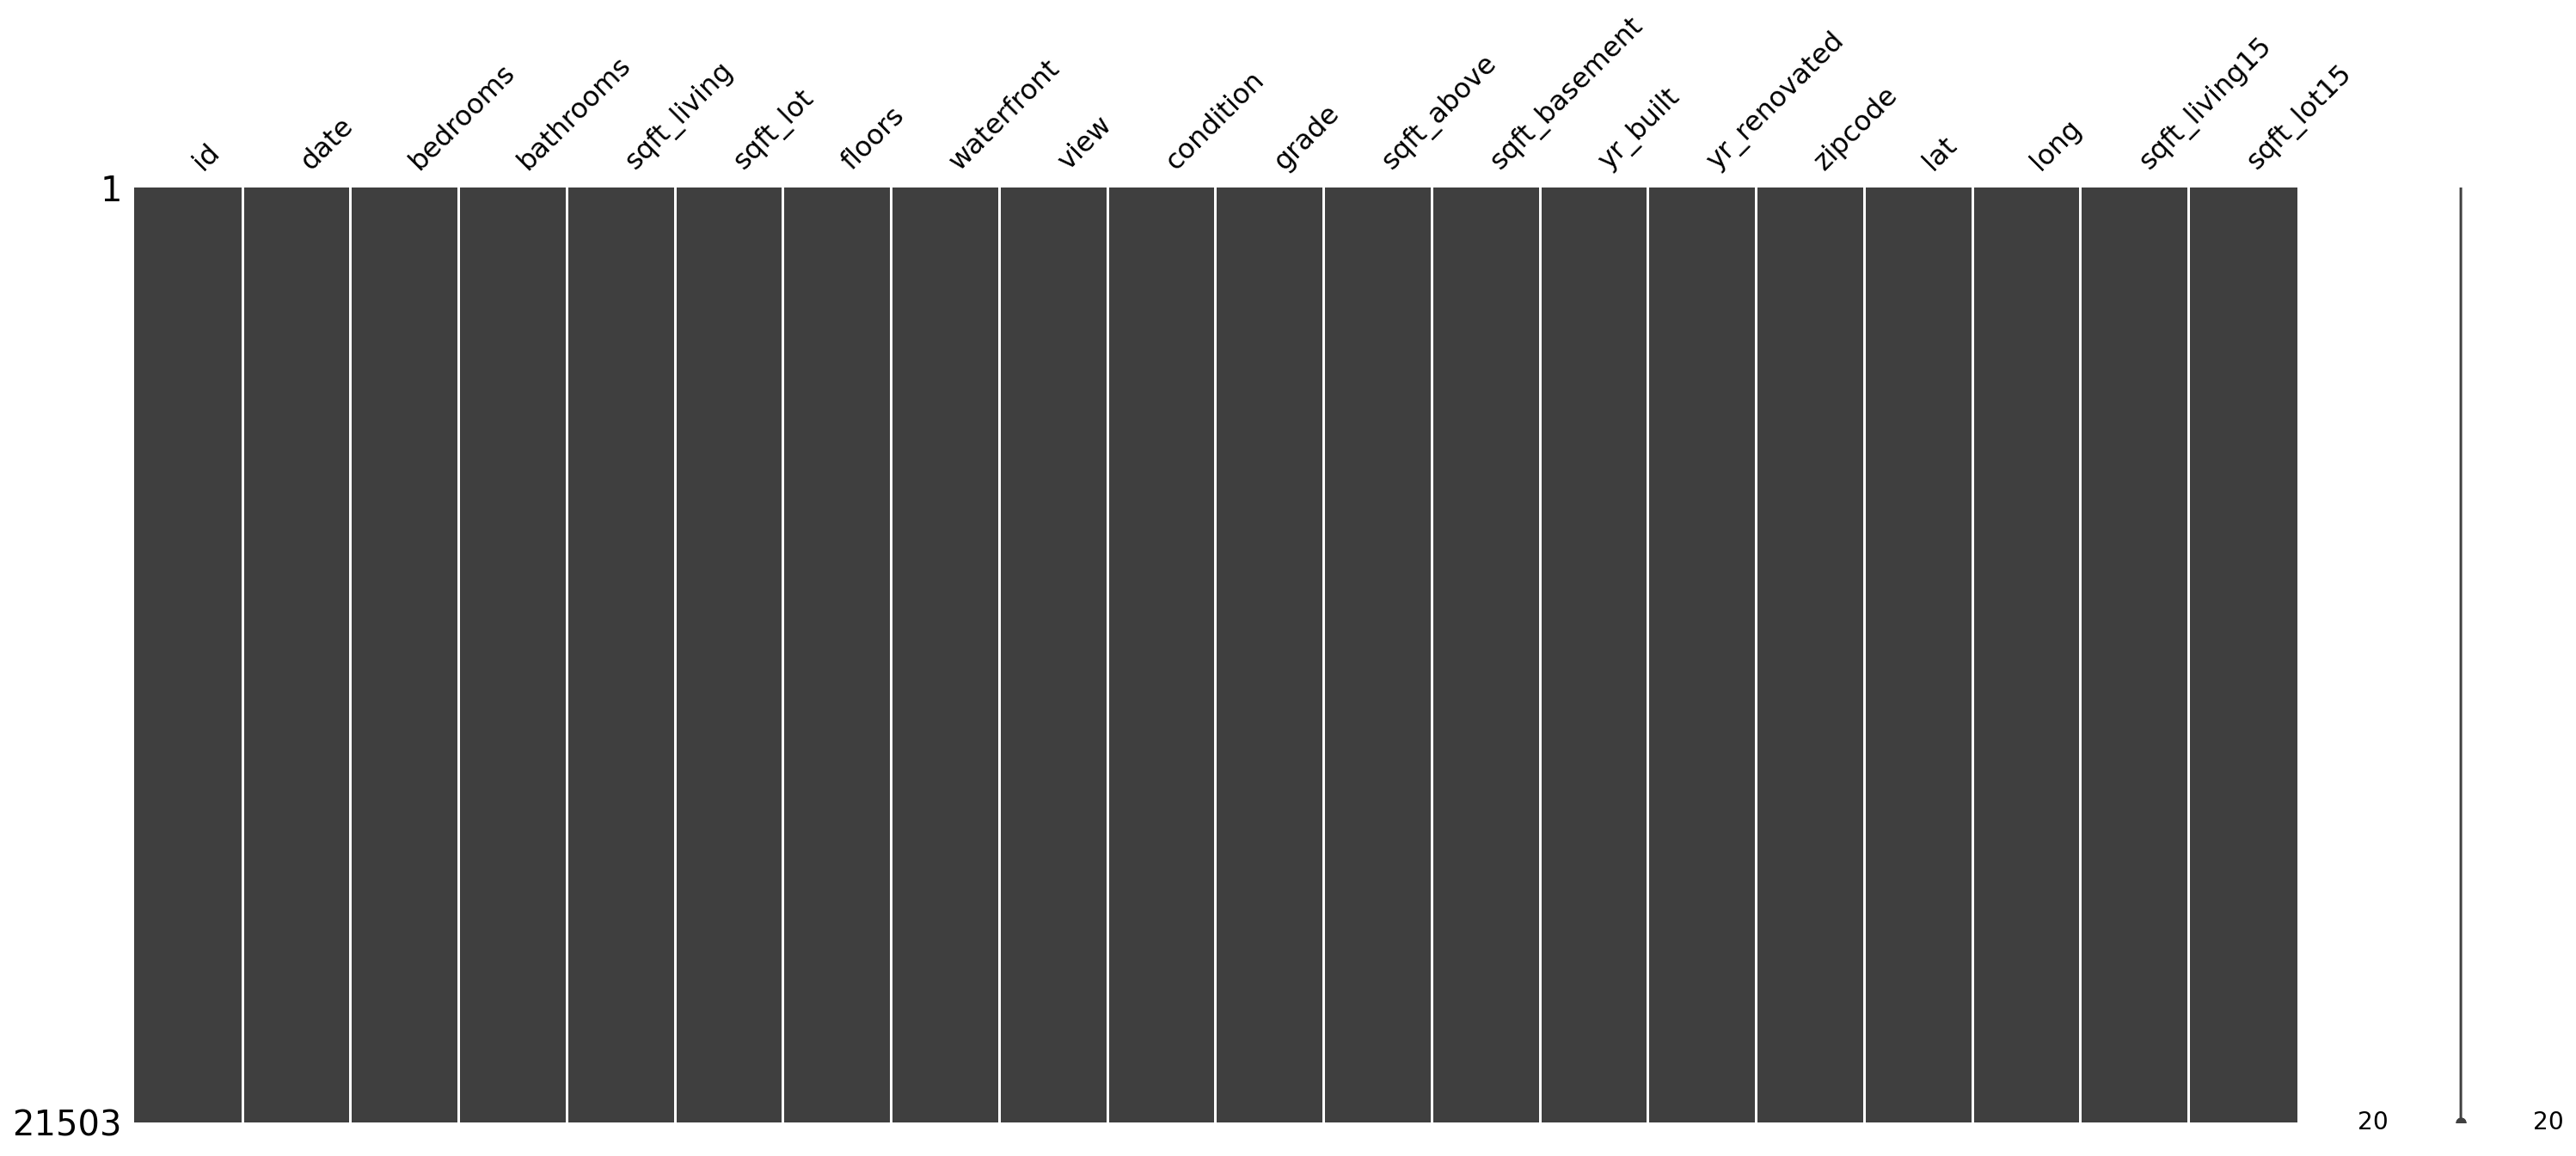

In [10]:
msno.matrix(data)

위에 출력된 것은 data라는 DataFrame을 매트릭스 모양 그대로 시각화한 것입니다. 만약 특정 row, col에 NaN이라는 결측치가 있었다면 해당 부분이 하얗게 나옵니다. 결측치가 없다면 매트릭스 전체가 까맣게 나올 겁니다. 실제로 그렇게 나왔나요??

[데이터프레임 고급 인덱싱](https://datascienceschool.net/01%20python/04.03%20%EB%8D%B0%EC%9D%B4%ED%84%B0%ED%94%84%EB%A0%88%EC%9E%84%20%EA%B3%A0%EA%B8%89%20%EC%9D%B8%EB%8D%B1%EC%8B%B1.html?highlight=%EB%8D%B0%EC%9D%B4%ED%84%B0%ED%94%84%EB%A0%88%EC%9E%84%20%EA%B3%A0%EA%B8%89%20%EC%9D%B8%EB%8D%B1%EC%8B%B1)

In [11]:
# 1. id 컬럼이 결측치인지 확인
null_check = pd.isnull(data['id'])
null_check

0       False
1       False
2       False
3       False
4       False
        ...  
6463    False
6464    False
6465    False
6466    False
6467    False
Name: id, Length: 21503, dtype: bool

In [12]:
# 2. 결측치인 데이터만 뽑아내기
null_data = data.loc[null_check, 'id']
null_data.head()

Series([], Name: id, dtype: int64)

In [13]:
# 3. 결측치인 데이터의 개수를 세기
print('{} : {}'.format('id', len(null_data.values)))

id : 0


In [14]:
# 한번에 작성하기
print('{} : {}'. format('id', len(data.loc[pd.isnull(data['id']), 'id'].values)))

id : 0


In [15]:
# id 컬럼 외에도 모든 컬럼에 적용해야 하니 for문을 사용하면 완성
for c in data.columns:
    print('{} : {}'. format(c, len(data.loc[pd.isnull(data[c]), c].values)))

id : 0
date : 0
bedrooms : 0
bathrooms : 0
sqft_living : 0
sqft_lot : 0
floors : 0
waterfront : 0
view : 0
condition : 0
grade : 0
sqft_above : 0
sqft_basement : 0
yr_built : 0
yr_renovated : 0
zipcode : 0
lat : 0
long : 0
sqft_living15 : 0
sqft_lot15 : 0


### (5) id, date 변수 정리

필요 없는 id 컬럼을 제거합니다. 나중에 예측 결과를 제출할 때를 대비하여 sub_id 변수에 id 칼럼을 저장해두고 지우도록 하겠습니다.

In [16]:
sub_id = data['id'][train_len:]
del data['id']

print(data.columns)

Index(['date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')


date 컬럼은 apply 함수로 필요한 부분만 잘라줍니다.

[Pandas Lambda, apply를 활용하여 복잡한 로직 적용하기](https://data-newbie.tistory.com/207)

In [17]:
data['date'] = data['date'].apply(lambda x : str(x[:6]))
data.head()

date  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0  201410         3       1.00         1180      5650     1.0           0   
1  201502         2       1.00          770     10000     1.0           0   
2  201502         3       2.00         1680      8080     1.0           0   
3  201406         3       2.25         1715      6819     2.0           0   
4  201501         3       1.50         1060      9711     1.0           0   

   view  condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
0     0          3      7        1180              0      1955             0   
1     0          3      6         770              0      1933             0   
2     0          3      8        1680              0      1987             0   
3     0          3      7        1715              0      1995             0   
4     0          3      7        1060              0      1963             0   

   zipcode      lat     long  sqft_living15  sqft_lot15  
0    98178  47.5112 -122.257           1340        5650  
1    98028  47.7379 -122.233           2720        8062  
2    98074  47.6168 -122.045           1800        7503  
3    98003  47.3097 -122.327           2238        6819  
4    98198  47.4095 -122.315           1650        9711

특히, 여기에서 str(x[:6]) 으로 처리한 것은 20141013T000000 형식의 데이터를 연/월 데이터만 사용하기 위해 201410까지 자르기 위한 것입니다.

### (6) 각 변수들의 분포 확인

전체 데이터들의 분포를 확인합니다.
특히 너무 치우친 분포를 가지는 컬럼의 경우 모델이 결과를 예측하는 데에 좋지 않은 영향을 미치므로 다듬는 작업을 합니다.

아래 시각화 코드를 통해 id 컬럼을 제외한 19개 컬럼에 대해 한 번에 모든 그래프를 그려줍니다.
10행 2열의 subplot에 그래프를 그리기 위해 2중 for문을 사용하고 있군요.

그래프의 종류는 sns.kdeplot을 사용합니다.
kdeplot은 이산(discrete) 데이터의 경우에도 부드러운 곡선으로 전체 분포를 확인할 수 있도록 하는 시각화 함수입니다.

[seaborn.kdeplot](https://seaborn.pydata.org/generated/seaborn.kdeplot.html)

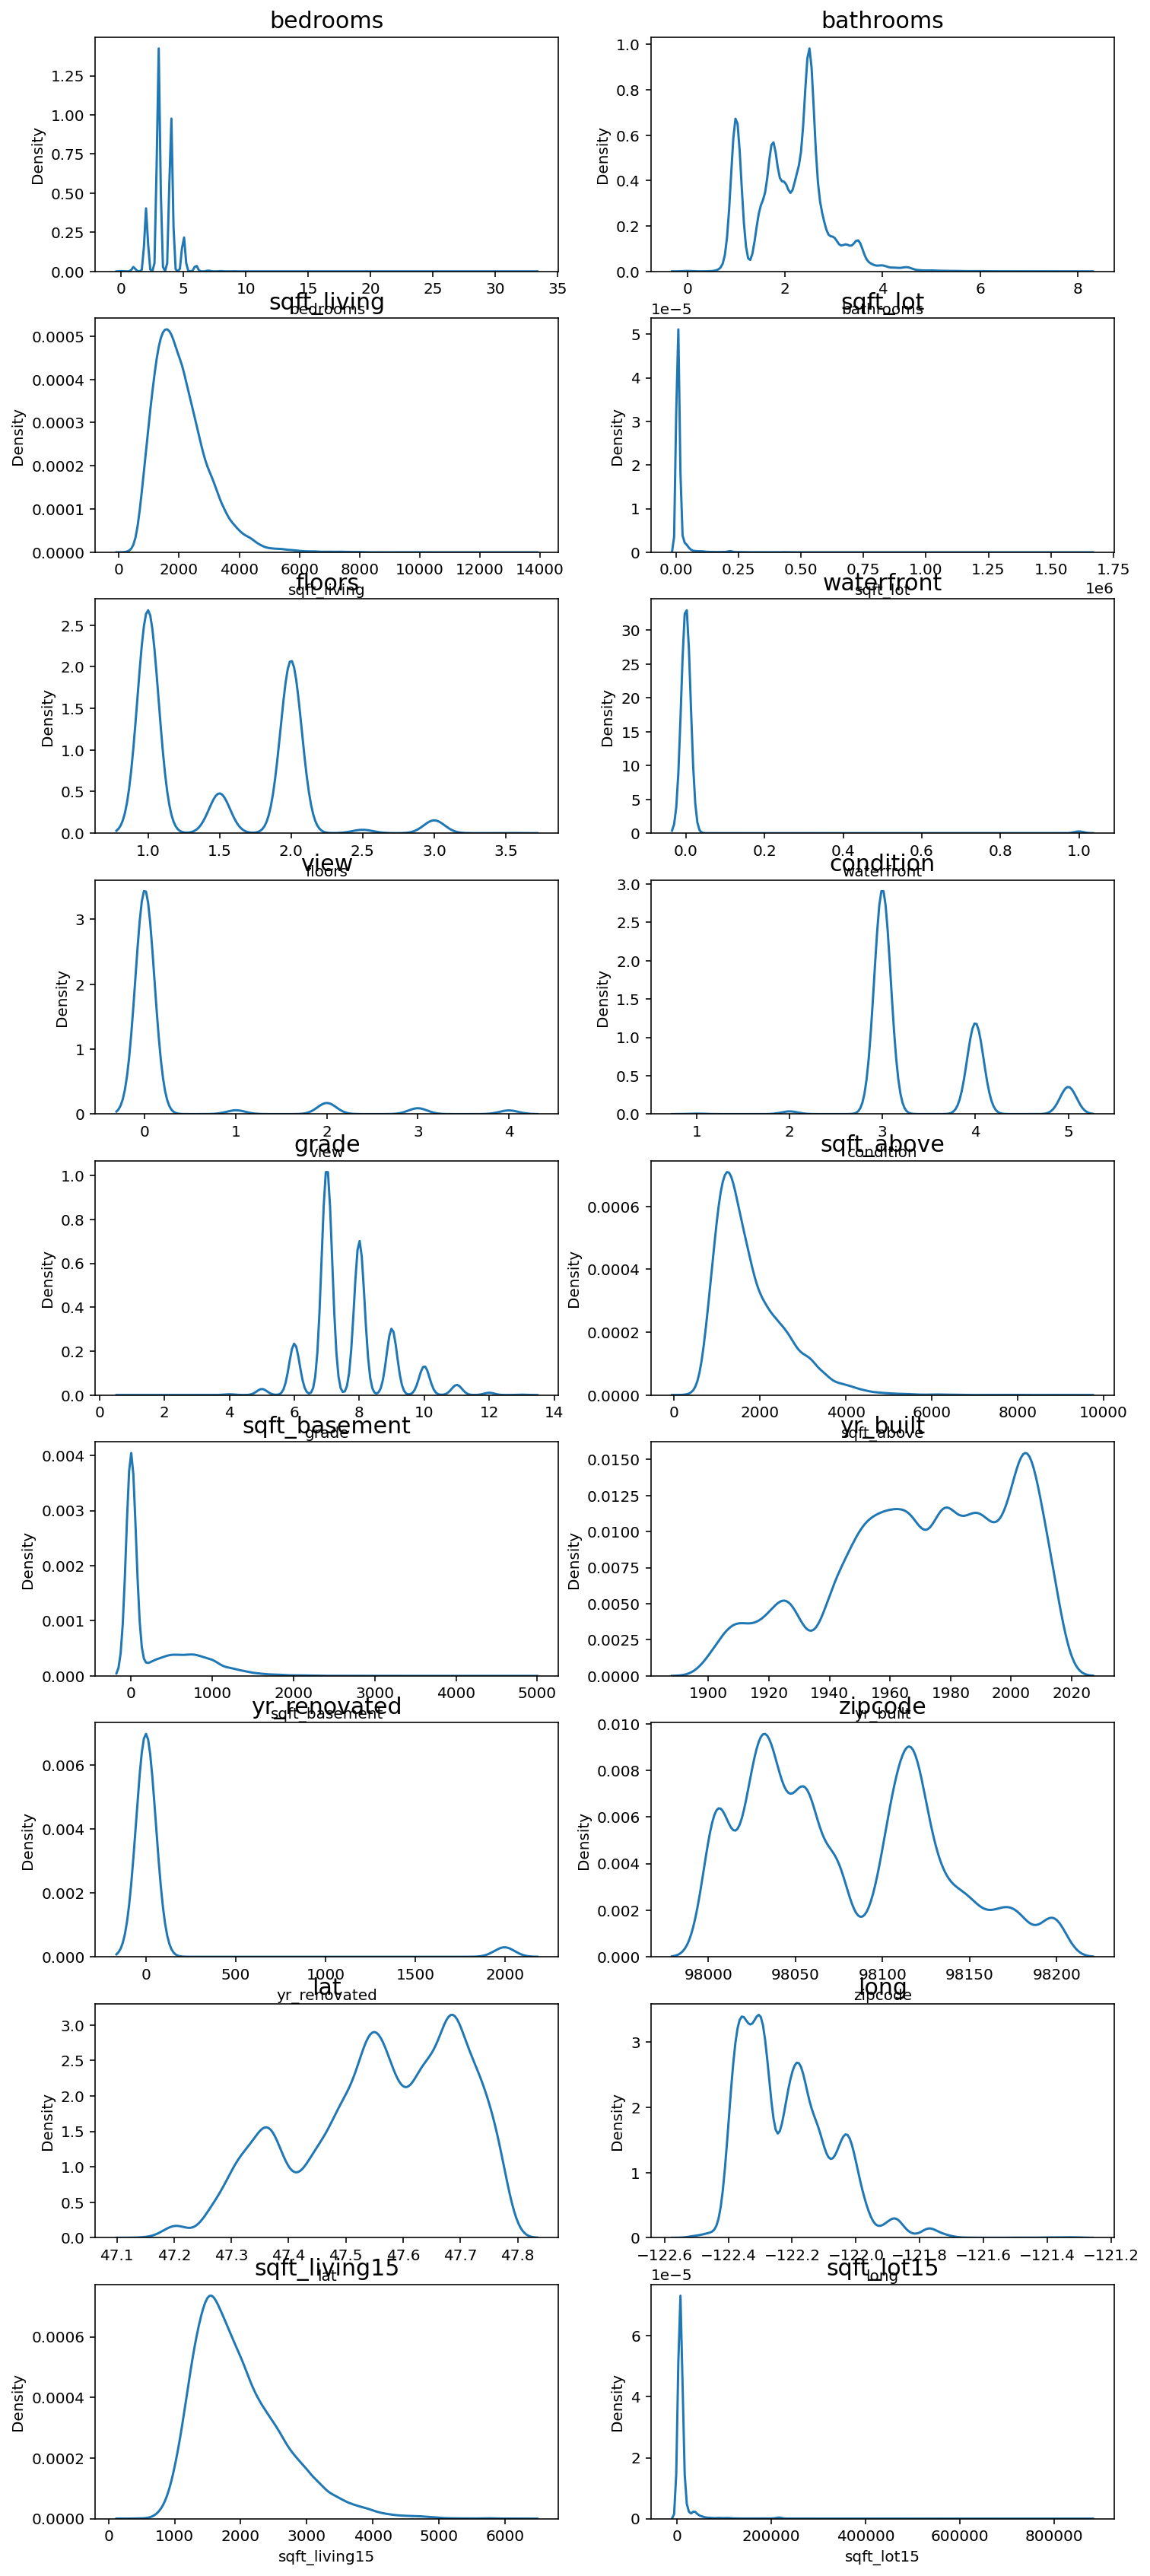

In [18]:
# 데이터 분포 확인하기
fig, ax = plt.subplots(9, 2, figsize = (12, 30))

# id 변수(count == 0인 경우)는 제외하고 분포를 확인함
count = 1
columns = data.columns
for row in range(9):
    for col in range(2):
        sns.kdeplot(data=data[columns[count]], ax=ax[row][col])
        ax[row][col].set_title(columns[count], fontsize = 15)
        count += 1
        if count == 19:
            break

bedrooms, sqft_living, sqft_lot, sqft_above, sqft_basement, sqft_living15, sqft_lot15 변수가 한쪽으로 치우친 경향을 보임

이렇게 한 쪽으로 치우친 분포의 경우에는 로그 변환(log-scaling)을 통해 데이터 분포를 정규분포에 가깝게 만들 수 있습니다. 자세한 이유는 아래에서 다시 다루고, 우선 결과부터 살펴봅시다

아래와 같이 치우친 컬럼들을 skew_columns 리스트 안에 담고, 모두 np.log1p()를 활용해서 로그 변환을 해주도록 하겠습니다. numpy.log1p() 함수는 입력 배열의 각 요소에 대해 자연로그 log(1 + x)을 반환해 주는 함수입니다.

In [19]:
# 각 요소에를 자연로그로 변환해주기
skew_columns = ['bedrooms', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'sqft_lot15', 'sqft_living15']

for c in skew_columns:
    data[c] = np.log1p(data[c].values)

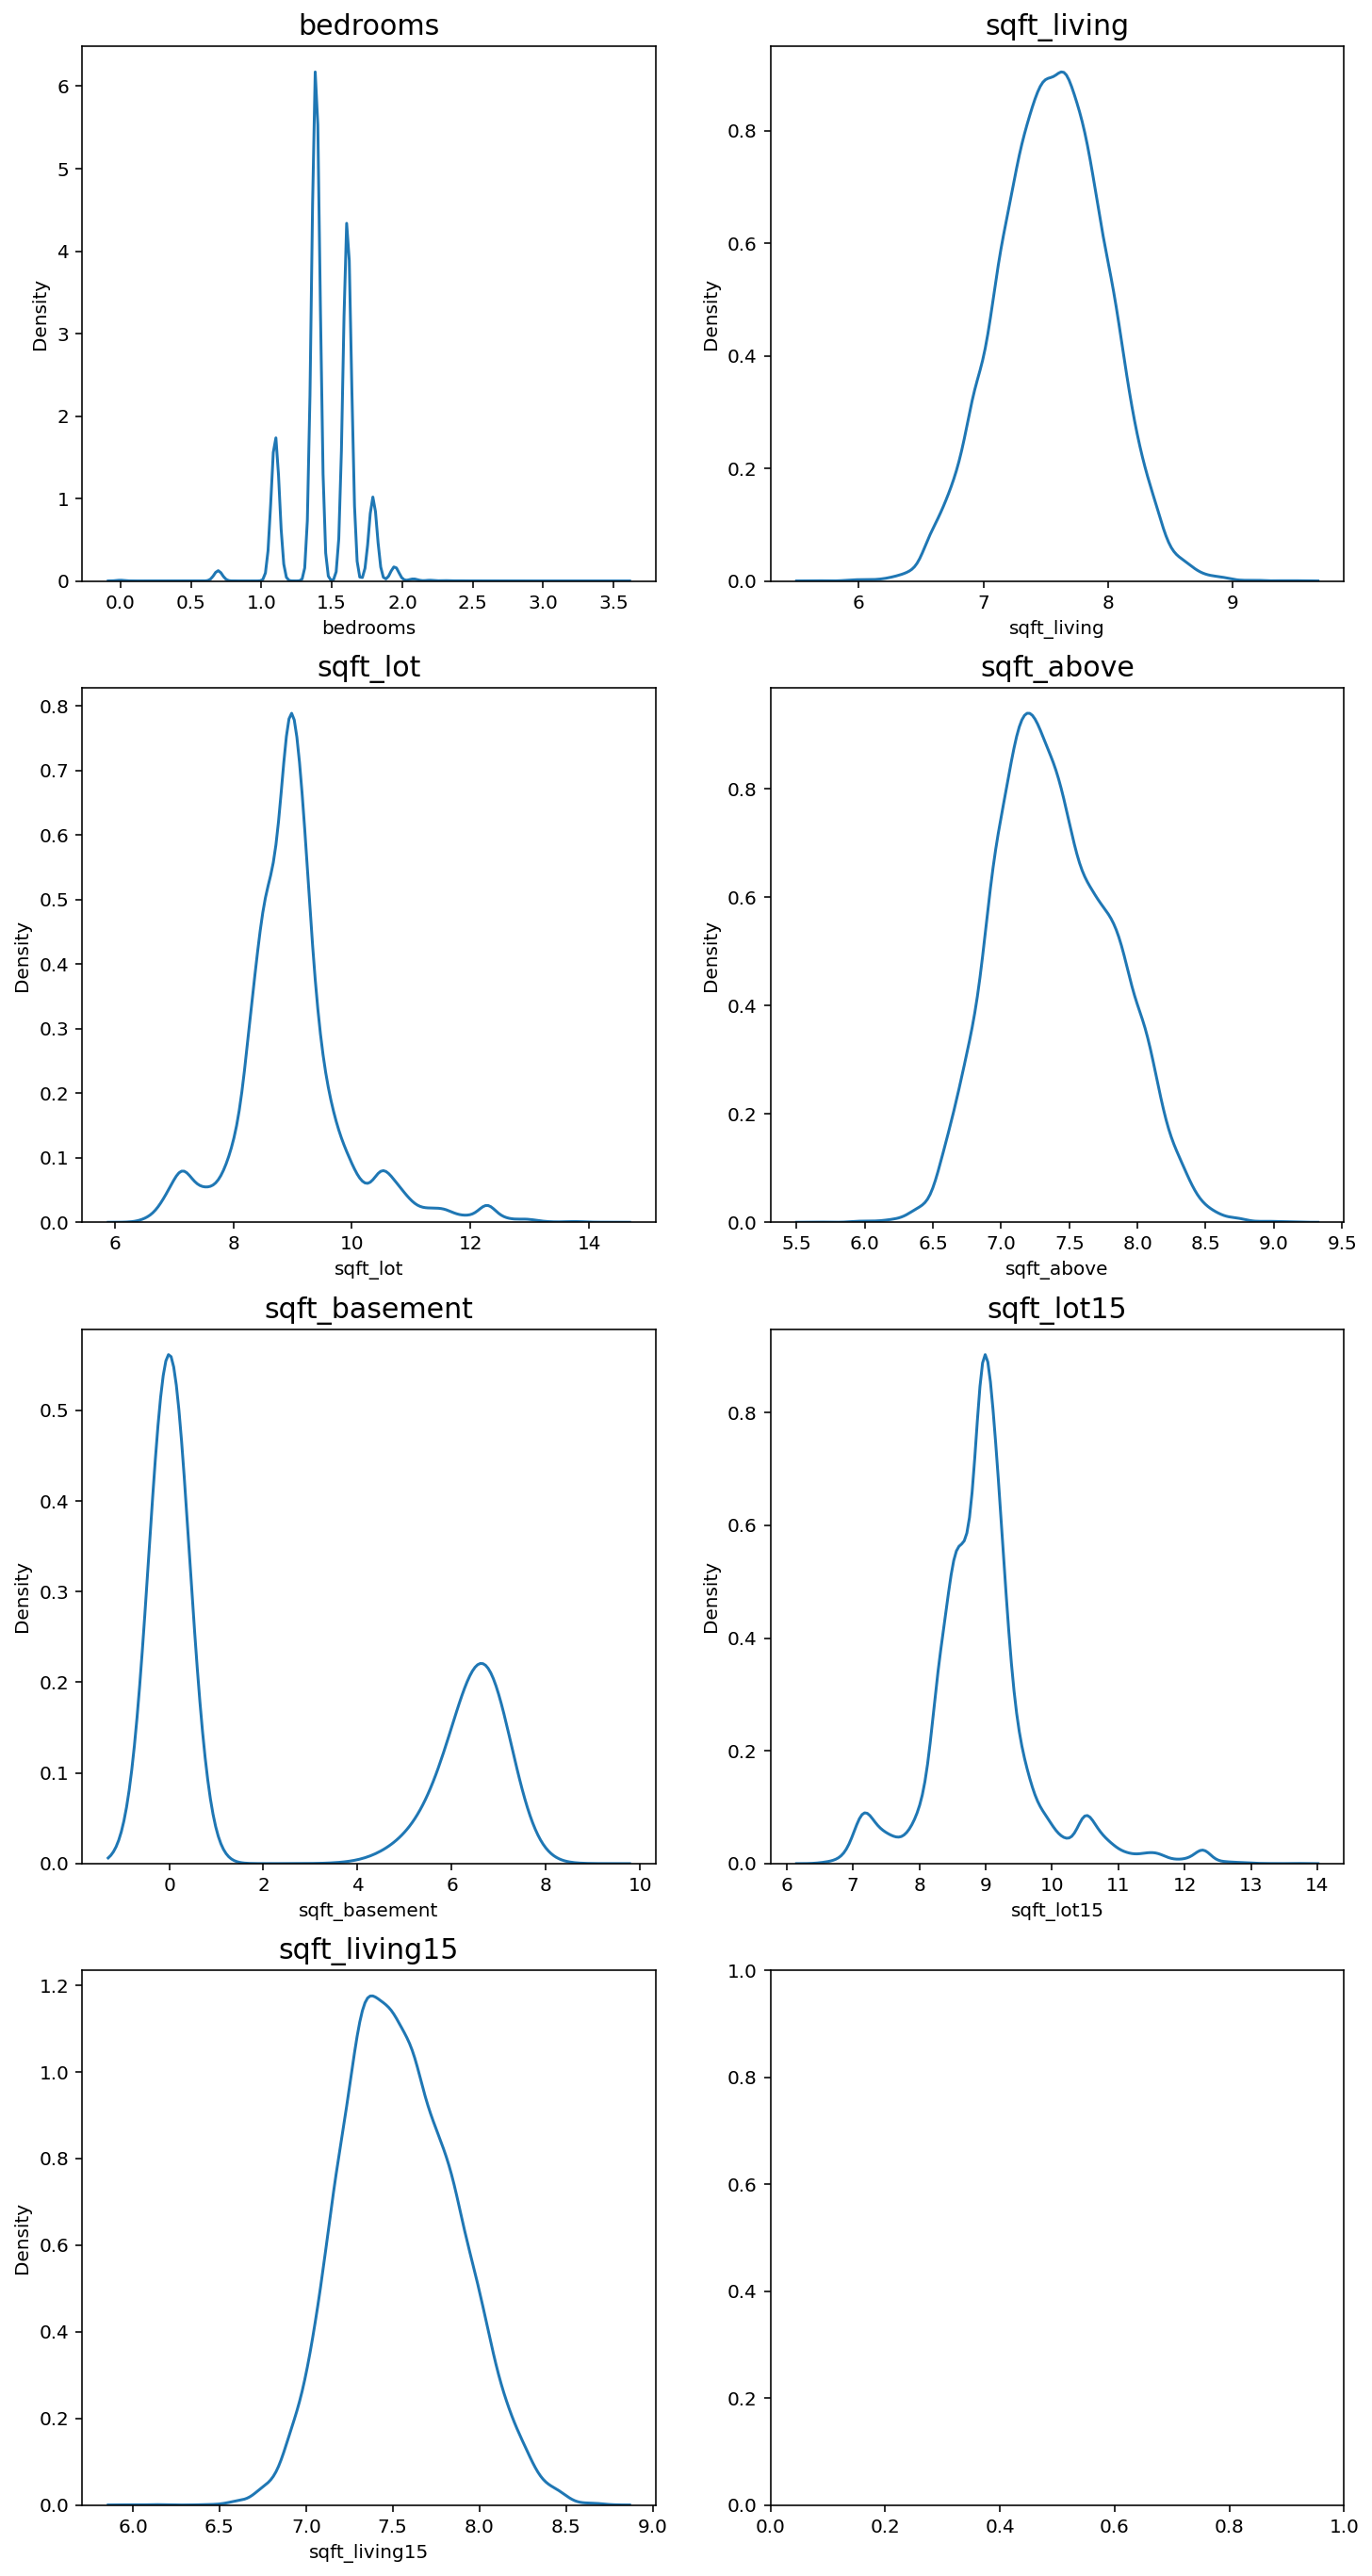

In [20]:
fig, ax = plt.subplots(4, 2, figsize=(12, 24))

count = 0
for row in range(4):
    for col in range(2):
        if count == 7:
            break
        sns.kdeplot(data = data[skew_columns[count]], ax = ax[row][col])
        ax[row][col].set_title(skew_columns[count], fontsize = 15)
        count += 1

이전보다 훨씬 치우침이 줄어든 분포를 확인할 수 있습니다.



#### 그렇다면 왜 로그 변환은 분포의 치우침을 줄어들게 만드는 걸까요?


- 이는 로그 함수의 형태를 보면 알 수 있습니다. 아래의 일반적인 로그 함수를 살펴봅시다.

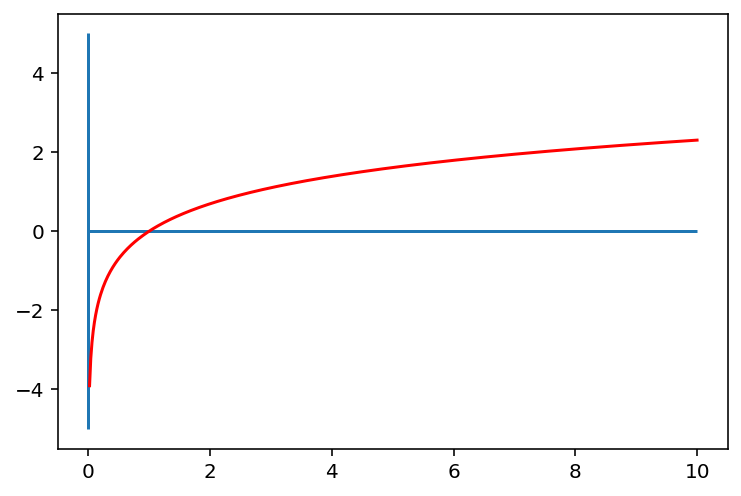

In [21]:
xx = np.linspace(0, 10, 500)
yy = np.log(xx)

plt.hlines(0, 0, 10)
plt.vlines(0, -5, 5)
plt.plot(xx, yy, c='r')
plt.show()

위와 같은 로그 함수의 특징은 다음과 같습니다.


0<x<1 범위에서는 기울기가 매우 가파릅니다. 즉, xx의 구간은 (0, 1)(0,1)로 매우 짧은 반면, yy의 구간은 (-\infty, 0)(−∞,0)으로 매우 큽니다.
따라서 0에 가깝게 모여있는 값들이 xx로 입력되면, 그 함수값인 yy 값들은 매우 큰 범위로 벌어지게 됩니다. 즉, 로그 함수는 0에 가까운 값들이 조밀하게 모여있는 입력값을, 넓은 범위로 펼칠 수 있는 특징을 가집니다.
반면, xx값이 점점 커짐에 따라 로그 함수의 기울기는 급격히 작아집니다. 이는 곧 큰 xx값들에 대해서는 yy값이 크게 차이나지 않게 된다는 뜻이고, 따라서 넓은 범위를 가지는 xx를 비교적 작은 yy값의 구간 내에 모이게 하는 특징을 가집니다.

위와 같은 특성 때문에 한 쪽으로 몰려있는 분포에 로그 변환을 취하게 되면 넓게 퍼질 수 있는 것이죠.

왜 한쪽으로 치우친 분포를 로그 변환을 취하게 되면 정규분포 모양으로 고르게 분포하게 될 수 있는지 이해가 되시나요?

그렇다면 우리가 맞추어야 할 타겟인 집의 가격, 즉 data[price]의 분포를 로그 변환했을 때 결과를 유추해봅시다.
원래 price의 분포는 다음과 같습니다.

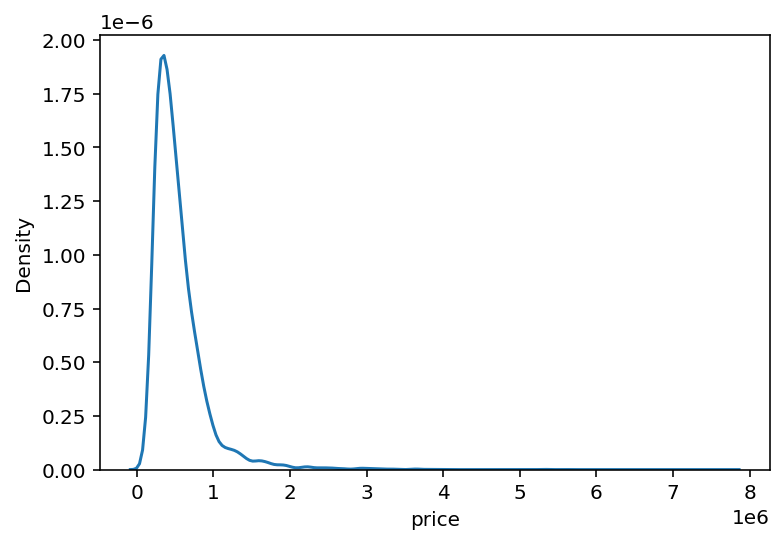

In [22]:
# price(target값)의 데이터 분포
sns.kdeplot(y)
plt.show()

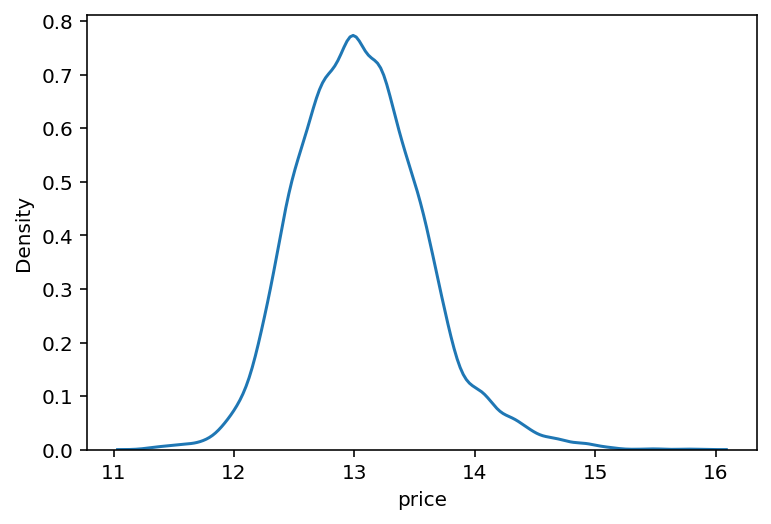

In [23]:
# price(target 값) log변환하기
y_log_transformation = np.log1p(y)

sns.kdeplot(y_log_transformation)
plt.show()

그러면 여기까지 로그 변환이 필요한 데이터에 대해 처리를 마무리하였으니, 아래와 같이 전체 데이터를 다시 나누어 줍니다.

위에서 저장해두었던 train_len을 인덱스로 활용해서 :train_len까지는 학습 데이터, 즉 x에 저장하고, train_len: 부터는 실제로 추론을 해야 하는 테스트 데이터, 즉 sub 변수에 저장합니다.

In [24]:
sub = data.iloc[train_len:, :]
x = data.iloc[:train_len, :]

print(x.shape)
print(sub.shape)

(15035, 19)
(6468, 19)


<div style = "height: 50px;"><div/>

## 4. 모델 설계
<hr/>

### 1. 모델링

이제 본격적으로 학습시킬 모델을 준비합니다. Baseline 커널에서는 여러 가지 모델을 함께 사용해서 결과를 섞는, 블렌딩(blending) 이라는 기법을 활용합니다.



블렌딩이란 하나의 개별 모델을 사용하는 것이 아니라 다양한 여러 모델을 종합하여 결과를 얻는 기법입니다.
블렌딩은 `앙상블 기법`이라고 하기도 하는데요, 자세한 내용을 다음 포스팅에서 살짝 읽어보겠습니다.

##  2. Average Blending

여러 가지 모델의 결과를 산술평균하여 블렌딩 모델을 만들겠습니다.

모델은 부스팅 계열인 gboost, xgboost, lightgbm 세 가지를 사용합니다.

In [25]:
gboost = GradientBoostingRegressor(random_state=2019)
xgboost = xgb.XGBRegressor(random_state=2019)
lightgbm = lgb.LGBMRegressor(random_state=2019)

models = [{'model':gboost, 'name':'GradientBoosting'}, {'model':xgboost, 'name':'XGBoost'},
          {'model':lightgbm, 'name':'LightGBM'}]

print('얍💢')

얍💢


## 3. Cross Validation

교차 검증을 통해 모델의 성능을 간단히 평가하겠습니다.

In [26]:
def get_cv_score(models):
    kfold = KFold(n_splits=5).get_n_splits(x.values)
    for m in models:
        CV_score = np.mean(cross_val_score(m['model'], X=x.values, y=y, cv=kfold))
        print(f"Model: {m['name']}, CV score:{CV_score:.4f}")
print('얍💢')

얍💢


In [27]:
get_cv_score(models)

Model: GradientBoosting, CV score:0.8598
Model: XGBoost, CV score:0.8860
Model: LightGBM, CV score:0.8819


## 4. Make Submission File

cross_val_score() 함수는 회귀모델을 전달할 경우 R2점수를 반환합니다.   
R2값은 1에 가까울수록 모델이 잘 학습되었다는 것을 나타냅니다.    
결정계수 R2값에 대한 간단한 설명은 아래 링크의 글을 참고하세요.

[결정계수 R squared](https://ltlkodae.tistory.com/19)

Baseline 모델에서는 다음과 같이 여러 모델을 입력하면 각 모델에 대한 예측 결과를 평균 내어 주는 AveragingBlending() 함수를 만들어 사용합니다. `AveragingBlending()` 함수는 models 딕셔너리 안에 있는 모델을 모두 x와 y로 학습시킨 뒤 predictions에 그 예측 결괏값을 모아서 평균한 값을 반환합니다.

In [28]:
def AveragingBlending(models, x, y, sub_x):
    for m in models : 
        m['model'].fit(x.values, y)
    
    predictions = np.column_stack([
        m['model'].predict(sub_x.values) for m in models
    ])
    return np.mean(predictions, axis=1)

print('얍💢')

얍💢


In [29]:
y_pred = AveragingBlending(models, x, y, sub)
print(len(y_pred))
y_pred

6468


array([ 529966.66304912,  430726.21272617, 1361676.91242777, ...,
        452081.69137012,  341572.97685942,  421725.1231835 ])

적당한 실수값들로 예측을 해낸 것 같습니다. 그렇다면 우리는 이 결과를 캐글에 제출하기 위해 어떻게 해야 할까요?

제출해야 하는 csv 파일의 샘플이 바로 data 폴더에 있는 sample_submission.csv 입니다.
다음 코드로 sample_submission.csv 파일을 확인해보겠습니다.



In [30]:
# sample_submission.csv 파일을 확인
submission_path = join('data/sample_submission.csv')
submission = pd.read_csv(submission_path)
submission.head()

id   price
0  15035  100000
1  15036  100000
2  15037  100000
3  15038  100000
4  15039  100000

id와 price의 두 가지 열로 구성되어 있습니다. 그렇다면 우리도 이에 맞게 id와 price로 구성된 데이터 프레임을 만들어주도록 하겠습니다.

In [31]:
result = pd.DataFrame({
    'id' : sub_id, 
    'price' : y_pred
})

result.head()

id         price
0  15035  5.299667e+05
1  15036  4.307262e+05
2  15037  1.361677e+06
3  15038  3.338036e+05
4  15039  3.089006e+05

좋습니다! 이제 제출할 일만 남았습니다. 다음 코드로 submission.csv 파일을 저장해 주세요!

In [32]:
my_submission_path = join('data/submission.csv')
result.to_csv(my_submission_path, index=False)

print(my_submission_path)

data/submission.csv


In [33]:
result

id         price
0     15035  5.299667e+05
1     15036  4.307262e+05
2     15037  1.361677e+06
3     15038  3.338036e+05
4     15039  3.089006e+05
...     ...           ...
6463  21498  2.478657e+05
6464  21499  4.156358e+05
6465  21500  4.520817e+05
6466  21501  3.415730e+05
6467  21502  4.217251e+05

[6468 rows x 2 columns]